# Introduction to Julia, part 1

<img src="./images/julia_logo.png" align="center" width="400"/>

https://julialang.org

## Types of programming languages

* **Compiler languages**: C/C++, Fortran, ... 
  - Directly compiled to machine code that is executed by CPU 
  - Pros: fast, memory efficient
  - Cons: longer development time, hard to debug

* **Interpreter languages**: R, MATLAB, Python, SAS IML, JavaScript, ... 
  - Interpreted by an interpreter
  - Pros: fast prototyping, scripting (Linux shell scripts, Perl)
  - Cons: excruciatingly slow for loops
  - Usually equipped with *REPL* (Read-Eval-Print Loop) or *shell*  


* Note : 'Compiler language' vs 'Intepreter language' is similar to 'reading a book' vs 'reading sentence by sentence' 
 
* Mixed (dynamic) languages: Java, Kotlin, Scala
  - Compiled into *byte code* by the compiler, byte code is interpreted by the *virtual machine* (JVM). This scheme achieves architecture independence.
  - More and more interpreter languages are adopting JIT("Just in time") technology: R (version 3.4+), MATLAB (R2015b+), Python (PyPy), Julia, ...
      + functions will be compiled before execution on the first or second use. For subsequent uses (e.g., calling the function within a loop), the speedup is significant.

* Distinction between complier and interpreter languages is getting blurred due to improved computation capabilities of the modern hardware and advanced compiler techniques.

* Database languages: SQL, Hive (Hadoop).  
  - Data analysis *never* happens if we do not know how to retrieve data from databases  

## Take-home messages

* To be versatile in the big data era, familiarize yourself with at least one language in each category.

* To improve efficiency of interpreted languages such as R or Matlab, conventional wisdom is to avoid loops as much as possible, a.k.a., **vectorize** code
> The only loop you are allowed to have is that for an iterative algorithm.

* When looping is unavoidable, need to code in C, C++, or Fortran.  
Success stories: the popular `glmnet` package in R is coded in Fortran; `tidyverse` packages use a lot Rcpp/C++.

* Modern languages such as Julia tries to solve the **two language problem**:
    - Prototype code goes into a high-level language
    - Production code goes into a low-level language
        + Note : 'high-level' language is closer to human language or mathemathical expression than 'low-level' one.

## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments.

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Long-term support release: v1.0.5, Sept. 2019
  - Current stable release: v1.6.2

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:
> Walks like Python. Runs like C.

<img src="./images/julia_vs_otherlang.png" align="center" width="800"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.  
Note : Despite of the fact that R uses JIT technology for recent version, R is still slower than Julia due to the difference in construction of languages.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.
    - You can't just take the magic dust that makes Julia fast and sprinkle it on your language of choice.

## R is great, but...

* The language encourages operating on the whole object (i.e. vectorized code). However, some tasks (e.g. MCMC) are not easily vectorized.

* Unvectorized R code (`for` and `while` loops) is slow. (http://adv-r.had.co.nz/Performance.html Section on performance starts with "Why is R slow?") 

* Techniques for large data sets – parallelization, memory mapping, database access, map/reduce – can be used but not easily. R is single threaded and most likely will stay that way.

* R functions should obey functional semantics (not modify arguments). Okay until you have very large objects on which small changes are made during parameter estimation.

* Sort-of object oriented using generic functions but implementation is casual. Does garbage collection but not based on reference counting.

* The real work is done in underlying C code and it is not easy to trace your way through it.

(by [Doug Bates](http://pages.stat.wisc.edu/~bates/), member of the R Core Team, author of `Matrix` and `lme4` packages, in [Julia for R programmers](http://pages.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf))

* Deficiencies in the core language 
  - Many fixed with packages (`devtools`, `roxygen2`, `Matrix`)
  - Others harder to fix (R uses an old version of BLAS)
  - Some impossible to fix (clunky syntax, poor design choices)
 
<!--
* Doug Bates' [Julia package for mixed-effects models](https://github.com/dmbates/MixedModels.jl)
    - Getting Doug on board was a big win for statistics with Julia, as he brought a lot of knowledge about the history of R development and design choices
    
    > As some of you may know, I have had a (rather late) mid-life crisis and run off with another language called Julia.   
    >
    > -- <cite>Doug Bates (on the [`knitr` Google Group](https://groups.google.com/forum/#!msg/knitr/F78PBMIamwk/X-d-zUhrdrkJ), 2013)</cite>
-->

## Learning resources

0. [Julia: A Fresh Approach to Numerical Computing](../../readings/BezansonEdelmanKarpinskiShah17Julia.pdf) by Jeff Bezanson, Alan Edelman, Stefan Karpinski, and Viral B. Shah, *SIAM REVIEW* Vol. 59, No. 1, pp. 65–98.

1. [Julia for R Programmers](http://www.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf) by Doug Bates.

2. YouTube: [Intro to Julia](https://www.youtube.com/watch?v=8h8rQyEpiZA&t) (2h28m), by Jane Herriman. 

3. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

4. Browse the Julia [documentation](https://docs.julialang.org/en).  

5. For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

    For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  


6. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Eval-Print Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julia prompt `julia>`. *Type backspace in other modes* to return to the default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode. (Note : very similar to 'terminal')  

4. **Package mode** `(@v1.6) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  
1. `quit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google (~~Naver~~).

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit fun(x)`.

* <https://discourse.julialang.org>.

* Friends.

## Some basic Julia code

In [65]:
# an integer, same as int in R
y = 1
typeof(y) 
#Int64 means 64-bit memory-worth integer 

Int64

In [66]:
# a Float64 number, same as double in R
y = 1.0
typeof(y) 

Float64

In [67]:
# Greek letters:  `\pi<tab>` ; enter \pi and then press tab
π

π = 3.1415926535897...

In [68]:
typeof(π)

Irrational{:π}

In [69]:
# Greek letters:  `\theta<tab>`
θ = y + π

4.141592653589793

In [70]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0

5.0

In [71]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

In [72]:
# vector of Float64 0s
x = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [73]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [74]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [75]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [76]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)
# Note : The difference between `zeros` and using `undef` is that the latter lacks the work of initialization 
# (which is filling zero in this case) so that it is faster.

5×3 Matrix{Float64}:
 2.73829e-314  2.34492e-314  2.73829e-314
 2.3449e-314   2.73829e-314  2.34492e-314
 2.257e-320    2.34492e-314  2.73829e-314
 2.34492e-314  2.73829e-314  2.34492e-314
 2.73829e-314  2.34492e-314  2.73829e-314

In [77]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [78]:
x

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [79]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Matrix{Float64}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [80]:
# rational number
a = 3//5

3//5

In [81]:
typeof(a)
# Note that typeof(a) is Float64 when a=3/5

Rational{Int64}

In [82]:
b = 3//7

3//7

In [83]:
a + b

36//35

In [84]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Matrix{Float64}:
 0.429325   0.910198  0.255371
 0.754279   0.811935  0.951703
 0.988363   0.470843  0.294583
 0.0437837  0.748756  0.19225
 0.051721   0.184674  0.836924

In [85]:
# uniform random numbers (in Float16)
x = rand(Float16, 5, 3)

5×3 Matrix{Float16}:
 0.788   0.4365  0.4824
 0.2148  0.2852  0.8564
 0.4736  0.866   0.2676
 0.753   0.9766  0.6963
 0.631   0.782   0.1113

In [86]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5×3 Matrix{Int64}:
 3  5  3
 2  5  1
 1  5  4
 4  5  4
 1  4  4

In [87]:
# standard normal random numbers
x = randn(5, 3)

5×3 Matrix{Float64}:
  0.39562    0.396688  -0.220179
 -1.03567   -1.227     -1.13857
 -1.36271   -0.387252   0.79865
 -1.77228    0.616302   0.979726
  0.942634  -1.27926   -1.15752

In [88]:
# range
1:10
# It is not same as the vector {1,2, ... , 10}. It saves the memory compared to the latter.

1:10

In [89]:
typeof(1:10)

UnitRange{Int64}

In [90]:
1:2:10

1:2:9

In [91]:
typeof(1:2:10)

StepRange{Int64, Int64}

In [92]:
# integers 1-10
x = collect(1:10)
# `collect` converts range to a vector.

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [93]:
# or equivalently
[1:10...]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [94]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [95]:
# convert to a specific type
y=convert(Vector, 1:10)
z=convert(Vector{Float64}, 1:10)
print(y) ; print(z)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10][1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

## Julia package system

* Like R, the functionality of Julia can be extended by using packages.

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [https://julialang.org/packages/](https://julialang.org/packages/).
    - Note : similar to CRAN for R

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.6) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.6) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.6) pkg> add https://github.com/kose-y/ParProx.jl
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/packages` directory in your home directory. 

Package dependencies are very important in reproducing results. In Julia they can be managed at each project, with `Project.toml' and 'Manifest.toml' files (see [here](https://bkamins.github.io/julialang/2020/05/10/julia-project-environments.html)). For example, this lecture note is a project whose environment has the following dependencies.

In [96]:
using Pkg
Pkg.activate("../..")   # root directory of this project
Pkg.dependencies()

  Activating new environment at `~/Project.toml`


Dict{Base.UUID, Pkg.Types.PackageInfo}()

* Directory of a specific package can be queried by `pathof()`:

In [97]:
using Distributions

pathof(Distributions)  # should look different in your machine

"/Users/temporaryadministrator/.julia/packages/Distributions/jEqbk/src/Distributions.jl"

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
<br>
Now, the functions from the Distributions package are available only using 

```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

* What **Distributions** package can give us

In [131]:
using Distributions
methods(Normal)

# 5 methods for type constructor:
[1] Normal() in Distributions at /Users/temporaryadministrator/.julia/packages/Distributions/jEqbk/src/univariate/continuous/normal.jl:45
[2] Normal(μ::Integer, σ::Integer) in Distributions at /Users/temporaryadministrator/.julia/packages/Distributions/jEqbk/src/univariate/continuous/normal.jl:43
[3] Normal(μ::T) where T<:Real in Distributions at /Users/temporaryadministrator/.julia/packages/Distributions/jEqbk/src/univariate/continuous/normal.jl:44
[4] Normal(μ::T, σ::T; check_args) where T<:Real in Distributions at /Users/temporaryadministrator/.julia/packages/Distributions/jEqbk/src/univariate/continuous/normal.jl:36
[5] Normal(μ::Real, σ::Real) in Distributions at /Users/temporaryadministrator/.julia/packages/Distributions/jEqbk/src/univariate/continuous/normal.jl:42

In [140]:
n1 = Normal(2, 0.25)
(xvalues= LinRange(1, 2, 11))'

1×11 adjoint(::LinRange{Float64}) with eltype Float64:
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.0

In [141]:
println([mean(n1) median(n1) modes(n1) std(n1) var(n1)])
println([skewness(n1) kurtosis(n1)])


[2.0 2.0 2.0 0.25 0.0625]
[0.0 0.0]


In [142]:
[pdf(n1, xvalues) cdf(n1, xvalues) quantile(n1, LinRange(0,1,11))]

11×3 Matrix{Float64}:
 0.000535321  3.16712e-5   -Inf
 0.00244761   0.000159109    1.67961
 0.00953635   0.000687138    1.78959
 0.0316618    0.00255513     1.8689
 0.0895781    0.00819754     1.93666
 0.215964     0.0227501      2.0
 0.443683     0.0547993      2.06334
 0.776744     0.11507        2.1311
 1.15877      0.211855       2.21041
 1.47308      0.344578       2.32039
 1.59577      0.5           Inf

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

In [98]:
using RCall

x = randn(1000)
println(typeof(x))


Vector{Float64}


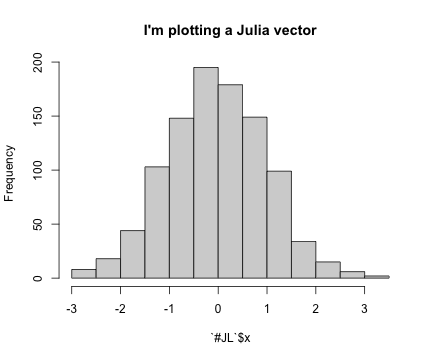

RObject{VecSxp}
$breaks
 [1] -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5

$counts
 [1]   8  18  44 103 148 195 179 149  99  34  15   6   2

$density
 [1] 0.016 0.036 0.088 0.206 0.296 0.390 0.358 0.298 0.198 0.068 0.030 0.012
[13] 0.004

$mids
 [1] -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25  2.75
[13]  3.25

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [99]:
R"""
hist($x, main="I'm plotting a Julia vector")
"""

# Note : Dollar sign `$` is used to interpret a julia object as an R obejct.

In [100]:
R"""
library(ggplot2)
qplot($x, bins=15)
"""

LoadError: REvalError: Error in library(ggplot2) : there is no package called ‘ggplot2’

In [101]:
x = R"""
rnorm(10)
"""
println(x)
typeof(x)

RObject{RealSxp}
 [1]  0.79771632 -1.68392181  0.25679690 -0.82034759 -1.09430492 -0.08641166
 [7] -0.43172278  0.10139263  0.25966853  1.47422128



RObject{RealSxp}

In [102]:
# collect R variable into Julia workspace
y = collect(x)

10-element Vector{Float64}:
  0.7977163196657583
 -1.6839218054948575
  0.2567968990752647
 -0.8203475948706141
 -1.0943049157061093
 -0.0864116571518962
 -0.43172278350515997
  0.10139262726768015
  0.259668529063201
  1.4742212783383095

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- rnorm(10)
Julia> @rget r
```
<br>

* Note : `@` is a called as Julia macro
* If you want to call Julia within R, check out the [`XRJulia`](https://cran.r-project.org/web/packages/XRJulia/) package by John Chambers.

## Timing and benchmark

### Julia

`@time`, `@elapsed`, `@allocated` macros:

In [103]:
using Random # standard library
Random.seed!(123) # seed
x = rand(1_000_000) # 1 million random numbers in [0, 1)

@time sum(x) # first run includes compilation time

  0.000622 seconds (1 allocation: 16 bytes)


500060.34072352527

In [104]:
@time sum(x) # no compilation time after first run

  0.000747 seconds (1 allocation: 16 bytes)


500060.34072352527

In [105]:
@elapsed sum(x)
# just the runtime (unit is seconds)

0.00058327

In [106]:
@allocated sum(x)
# just the allocation (unit is bytes)

16

Use package `BenchmarkTools.jl` for more robust benchmarking. Analog of `microbenchmark` package in R.

In [107]:
using BenchmarkTools

bm = @benchmark sum($x)  
# Dollar sign '$' to avoid problems with globals 
# Note : benchmark package의 요구사항 정도로 이해하자.

LoadError: ArgumentError: Package BenchmarkTools not found in current path:
- Run `import Pkg; Pkg.add("BenchmarkTools")` to install the BenchmarkTools package.


In [108]:
using Statistics # standard library
benchmark_result = Dict() # a dictionary to store median runtime (in milliseconds)
benchmark_result["Julia builtin"] = median(bm.times) / 1e6

LoadError: UndefVarError: bm not defined

In [109]:
bm.times
# Note : recorded in nanoseconds

LoadError: UndefVarError: bm not defined

In [110]:
benchmark_result

Dict{Any, Any}()

### C

We would use the low-level C code as the baseline for copmarison. In Julia, we can easily run compiled C code using the `ccall` function. This is similar to `.C` in R.

In [111]:
using Libdl

C_code = """
#include <stddef.h>
double c_sum(size_t n, double *X) {
    double s = 0.0;
    for (size_t i = 0; i < n; ++i) {
        s += X[i];
    }
    return s;
}
"""

const Clib = tempname()   # make a temporary file

# compile to a shared library by piping C_code to gcc
# (works only if you have gcc installed):

open(`gcc -std=c99 -fPIC -O3 -msse3 -xc -shared -o $(Clib * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# define a Julia function that calls the C function:
c_sum(X::Array{Float64}) = ccall(("c_sum", Clib), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum (generic function with 1 method)

In [112]:
# make sure it gives same answer
c_sum(x)

500060.340723512

In [113]:
bm = @benchmark c_sum($x)

LoadError: LoadError: UndefVarError: @benchmark not defined
in expression starting at In[113]:1

In [114]:
# store median runtime (in milliseconds)
benchmark_result["C"] = median(bm.times) / 1e6

LoadError: UndefVarError: bm not defined

### R, builtin `sum`

Next we compare to the build in `sum` function in R, which is implemented using C.

In [115]:
using RCall
# Note : R에서 microbenchmark library를 설치해야 작동함.
R"""
library(microbenchmark)
y <- $x
rbm <- microbenchmark(sum(y))
"""


LoadError: REvalError: Error in library(microbenchmark) : 
  there is no package called ‘microbenchmark’

In [116]:
@rget rbm # dataframe

LoadError: BoundsError

In [117]:
# store median runtime (in milliseconds)

benchmark_result["R builtin"] = median(rbm[!, :time]) / 1e6
# Note : `dataframe[!, :colname]` is a syntax of subsetting dataframe in julia (From : the documentation of DataFrames.jl)

LoadError: UndefVarError: rbm not defined

### R, handwritten loop

Handwritten loop in R is much slower.

In [118]:
using RCall
# C code와 비슷하게 만들어보자.
R"""
sum_r <- function(x) {
  s <- 0
  for (x.i in x) {
    s <- s + x.i
  }
  s
}
library(microbenchmark)
y <- $x
rbm <- microbenchmark(sum_r(y))
"""

LoadError: REvalError: Error in library(microbenchmark) : 
  there is no package called ‘microbenchmark’

In [119]:
# store median runtime (in milliseconds)
@rget rbm # dataframe
benchmark_result["R loop"] = median(rbm[!, :time]) / 1e6

LoadError: BoundsError

### Python, builtin `sum`

Built in function `sum` in Python.

In [120]:
using PyCall
PyCall.pyversion

v"3.9.5"

In [121]:
# get the Python built-in "sum" function:
pysum = pybuiltin("sum")
bm = @benchmark $pysum($x)

LoadError: LoadError: UndefVarError: @benchmark not defined
in expression starting at In[121]:3

In [122]:
# store median runtime (in miliseconds)
benchmark_result["Python builtin"] = median(bm.times) / 1e6

LoadError: UndefVarError: bm not defined

### Python, handwritten loop

In [123]:
using PyCall

py"""
def py_sum(A):
    s = 0.0
    for a in A:
        s += a
    return s
"""

sum_py = py"py_sum"

bm = @benchmark $sum_py($x)

LoadError: LoadError: UndefVarError: @benchmark not defined
in expression starting at In[123]:13

In [124]:
# store median runtime (in miliseconds)
benchmark_result["Python loop"] = median(bm.times) / 1e6

LoadError: UndefVarError: bm not defined

### Python, numpy

Numpy is the high-performance scientific computing library for Python (mostly written in C).

In [125]:
# bring in sum function from Numpy 
numpy_sum = pyimport("numpy")."sum"

PyObject <function sum at 0x7fe64dbdac10>

In [126]:
bm = @benchmark $numpy_sum($x)

LoadError: LoadError: UndefVarError: @benchmark not defined
in expression starting at In[126]:1

In [127]:
# store median runtime (in miliseconds)
benchmark_result["Python numpy"] = median(bm.times) / 1e6

LoadError: UndefVarError: bm not defined

Numpy performance is on a par with Julia built-in `sum` function. Both are about 3 times faster than C, probably because of insufficient optimization in compliation and overhead of passing Julia objects and receiving C pointers.

### Summary

In [128]:
benchmark_result

Dict{Any, Any}()

* `C` and `R builtin` are the baseline C performance (gold standard).

* `Python builtin` and `Python loop` are 80-100 fold slower than C because the loop is interpreted.

* `R loop` is about 30 folder slower than C and indicates the performance of bytecode generated by its compiler package (turned on by default since R v3.4.0 (Apr 2017)). 

* `Julia builtin` and `Python numpy` are 3-4 fold faster than C.

## Acknowledgment

This lecture note has evolved from [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Winter Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.